In [1]:
import pandas as pd
import numpy as np
import gzip
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.shape

(87020, 26)

In [4]:
test.shape

(37717, 24)

In [5]:
train.dtypes

ID                        object
Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                       int64
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted       float64
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
LoggedIn                   int64
Disbursed                  int64
dtype: object

In [6]:
train['source'] = 'train'
test['source'] = 'test'

In [7]:
total = train.isnull().sum()
percent = (train.isnull().sum())/(train.isnull().count())
tt = pd.concat([total,percent],axis = 1,keys = ['total','percent'])
types = []
for col in train.columns:
    dtype = str(train[col].dtype)
    types.append(dtype)
tt['Types'] = types
np.transpose(tt)

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed,source
total,0,0,1003,0,0,0,71,71,71,71,...,59600,59294,0,0,0,0,0,0,0,0
percent,0,0,0.0115261,0,0,0,0.000815904,0.000815904,0.000815904,0.000815904,...,0.6849,0.681384,0,0,0,0,0,0,0,0
Types,object,object,object,int64,object,object,float64,float64,float64,object,...,float64,float64,object,object,object,object,int64,int64,int64,object


In [8]:
data = pd.concat([train,test],ignore_index = True,sort = True)

In [9]:
pd.DataFrame(data.apply(lambda x:sum(x.isnull()))).rename(columns = {0:'missing_values'})

,missing_values
City,1401
DOB,0
Device_Type,0
Disbursed,37717
EMI_Loan_Submitted,84901
Employer_Name,113
Existing_EMI,111
Filled_Form,0
Gender,0
ID,0


In [10]:
categorical_feature_mask = data.dtypes == object
categorical_columns = data.columns[categorical_feature_mask].tolist()

<Figure size 432x288 with 0 Axes>

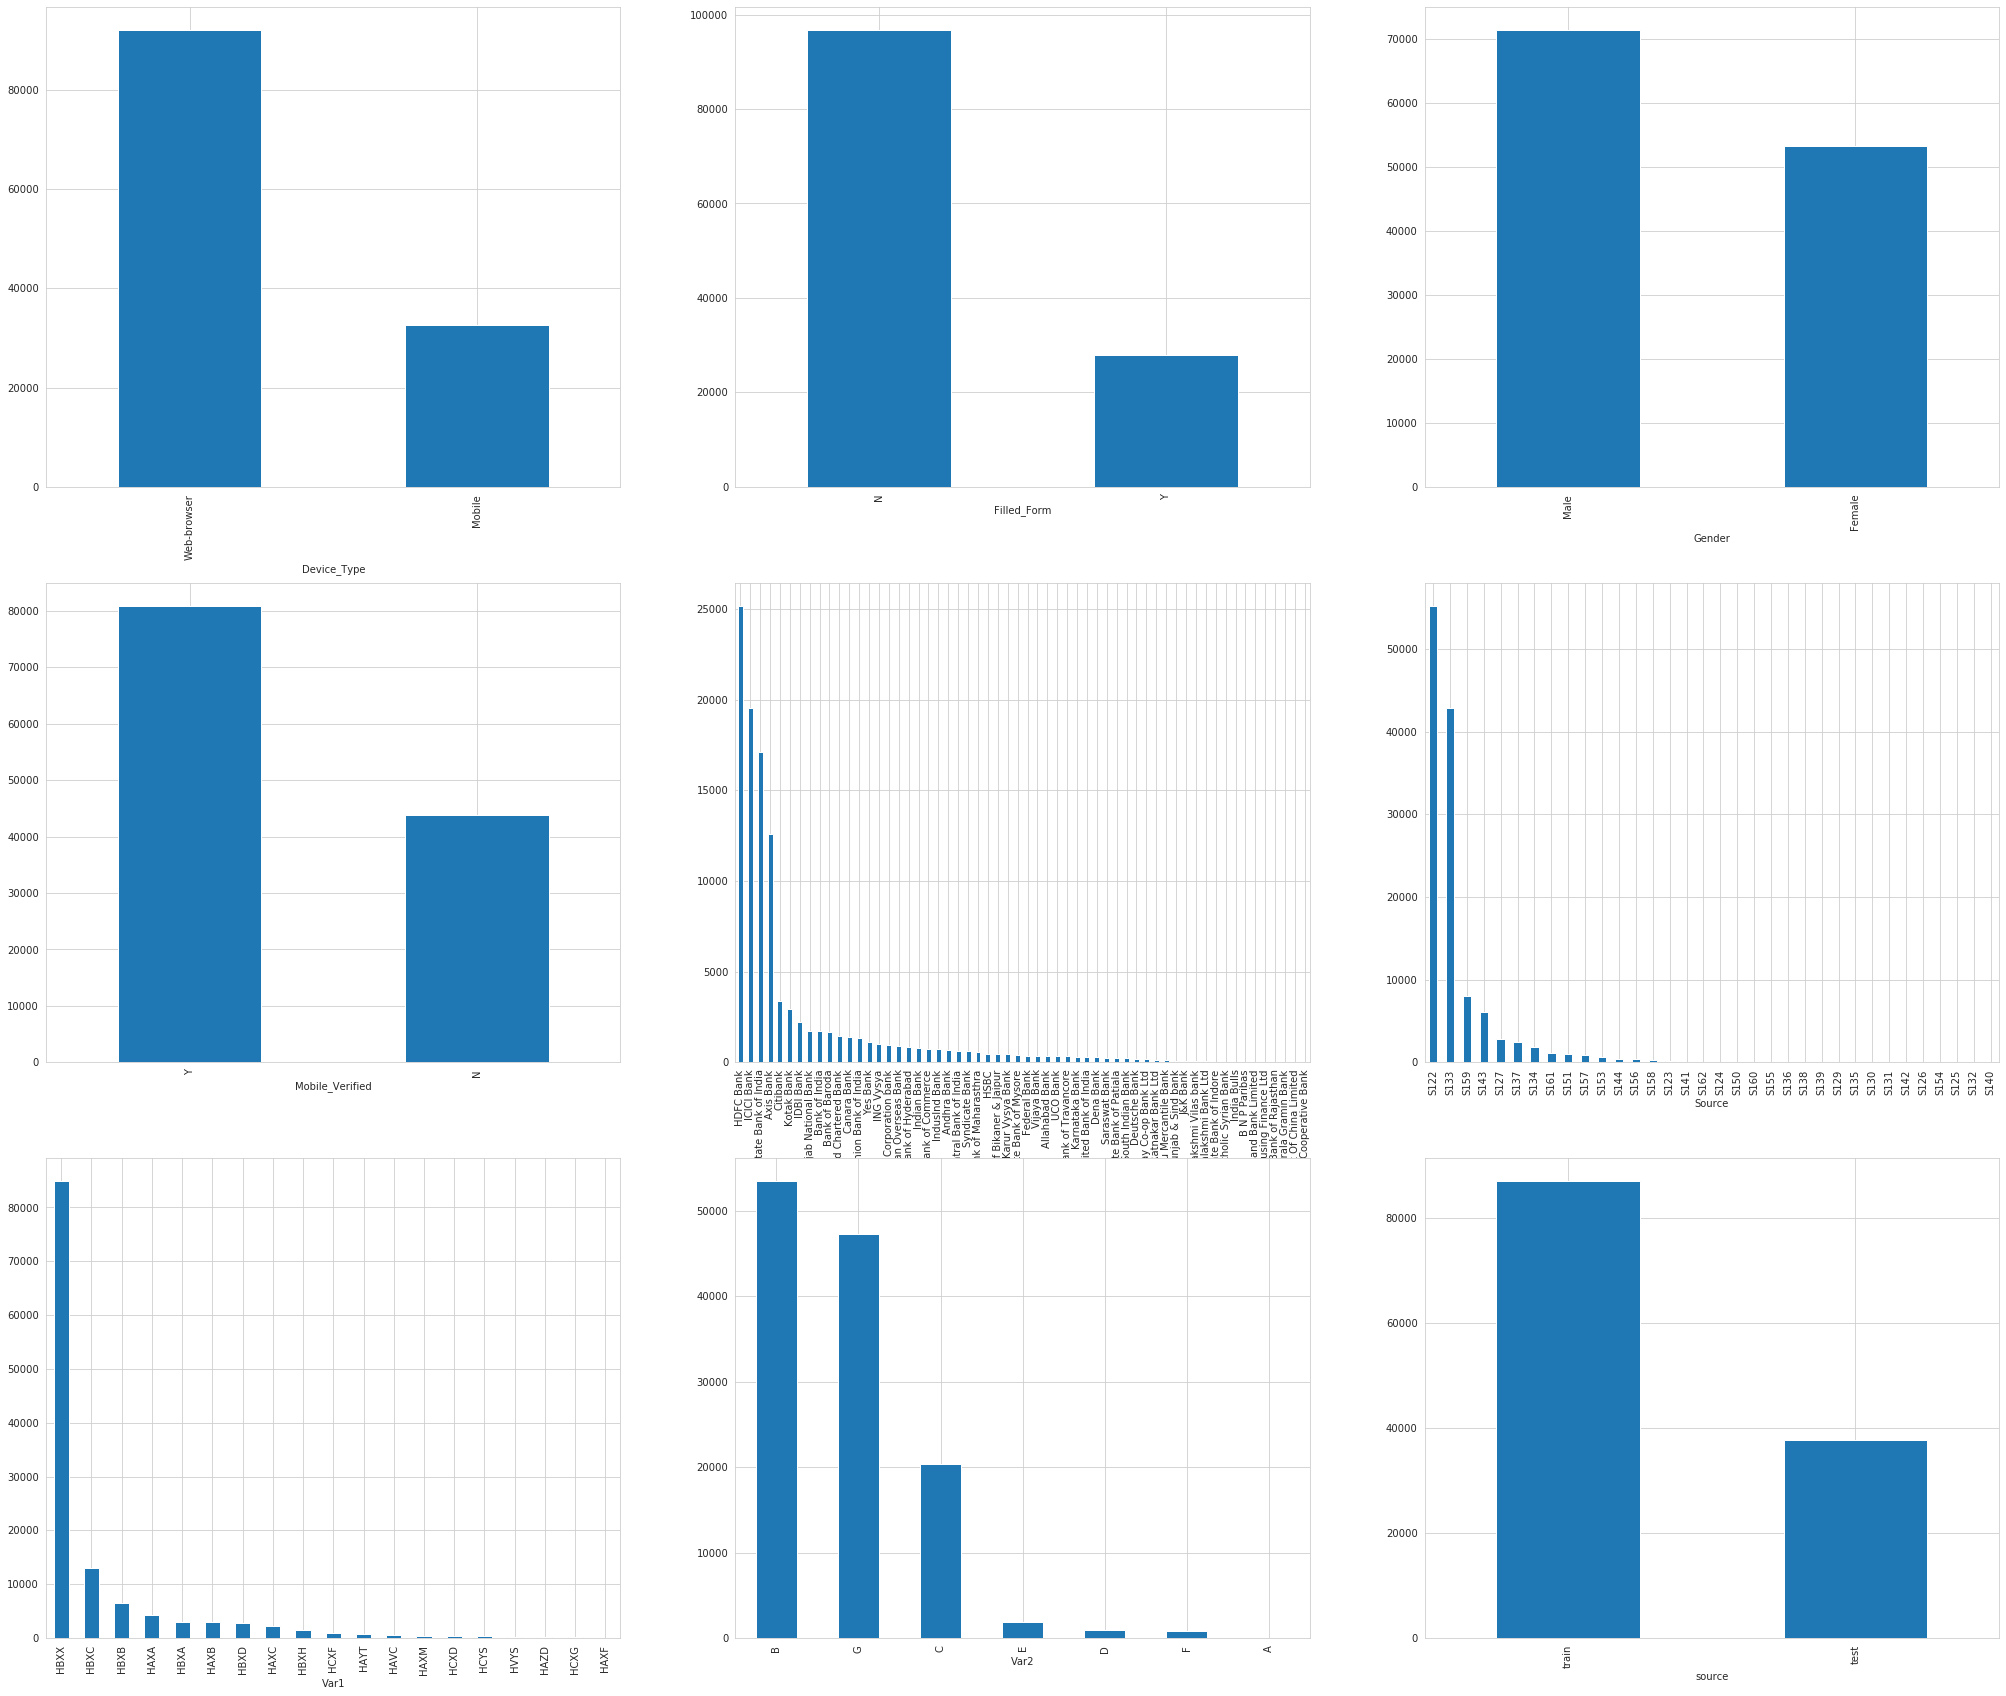

In [11]:
features =['Device_Type','Filled_Form', 'Gender','Mobile_Verified', 'Salary_Account',
       'Source', 'Var1', 'Var2', 'source']
sns.set_style('whitegrid')
plt.figure()
fig,ax = plt.subplots(3,3,figsize = (35,30))
i = 0
for feature in features:
    i = i + 1
    plt.subplot(3,3,i)
    data[feature].value_counts().plot(kind = 'bar')
    plt.xlabel(feature,)

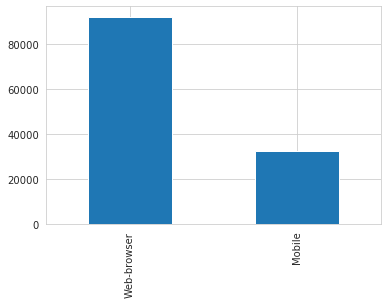

In [12]:
sns.set_style('whitegrid')
data['Device_Type'].value_counts().plot(kind = 'bar')

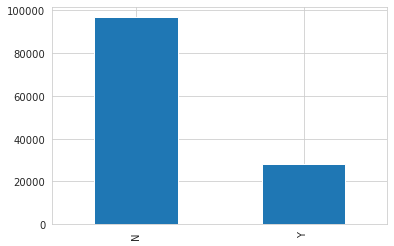

In [13]:
features =['Filled_Form', 'Gender','Mobile_Verified', 'Salary_Account',
       'Source', 'Var1', 'Var2', 'source']
sns.set_style('whitegrid')
data['Filled_Form'].value_counts().plot(kind = 'bar')

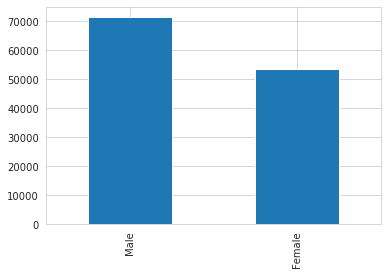

In [14]:
features =[ 'Gender','Mobile_Verified', 'Salary_Account',
       'Source', 'Var1', 'Var2', 'source']
sns.set_style('whitegrid')
data['Gender'].value_counts().plot(kind = 'bar')

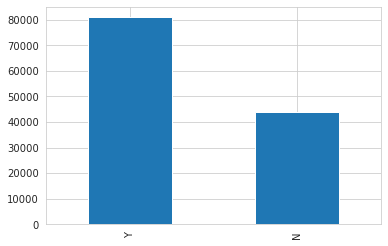

In [15]:
features =['Mobile_Verified', 'Salary_Account',
       'Source', 'Var1', 'Var2', 'source']
sns.set_style('whitegrid')
data['Mobile_Verified'].value_counts().plot(kind = 'bar')

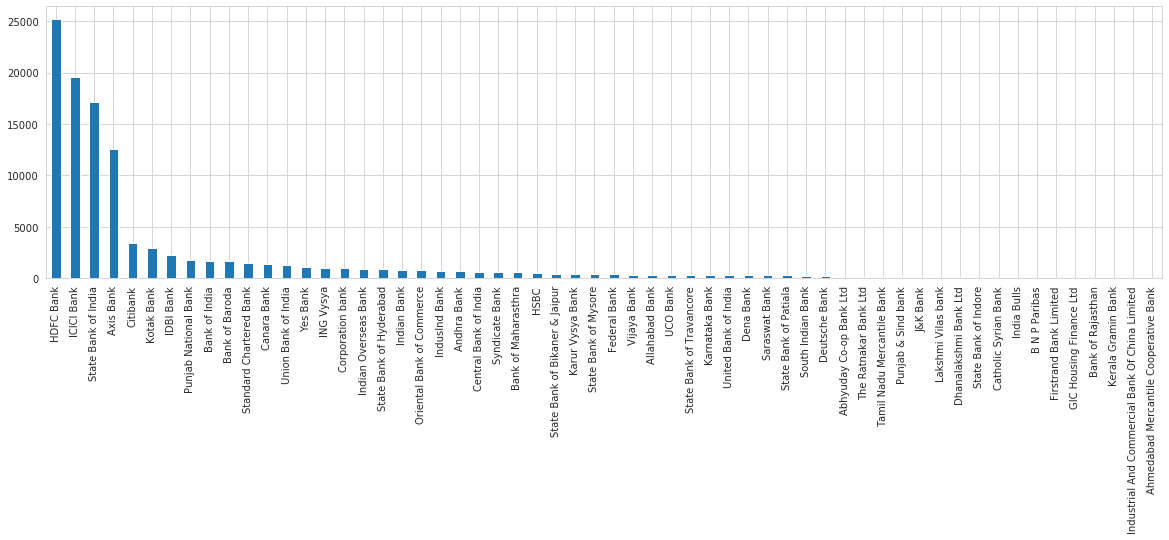

In [16]:
features =['Salary_Account',
       'Source', 'Var1', 'Var2', 'source']
sns.set_style('whitegrid')
data['Salary_Account'].value_counts().plot(kind = 'bar',figsize = (20,5))

In [17]:
len(data['City'].unique())
#there are many unique cities so lets ignore this cities

724

In [18]:
#(pd.to_datetime('today') - pd.to_datetime('1956-07-01')).days / 365.25

((pd.to_datetime('today') - pd.to_datetime('23-May-78')).days) / 365.25

41.713894592744694

In [19]:
data['DOB'] = pd.to_datetime(data['DOB'])

In [20]:
today = pd.to_datetime('today')

In [21]:
data['age'] = data['DOB'].apply(lambda x :((today - x).days/365.25) )

In [22]:
data.drop(columns = 'DOB',inplace = True)

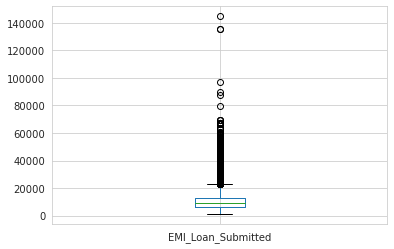

In [23]:
data['EMI_Loan_Submitted'].plot(kind = 'box')
# most of the values are missing values

In [24]:
#to overcome this lets create a new variable stating that wether this value is missing or not
data['EMI_Loan_Submitted_missing'] = data['EMI_Loan_Submitted'].apply(lambda x : 1 if pd.isnull(x) else 0)

In [25]:
data[['EMI_Loan_Submitted_missing','EMI_Loan_Submitted']]

,EMI_Loan_Submitted_missing,EMI_Loan_Submitted
0,1,NaN
1,0,6762.9
2,1,NaN
3,1,NaN
4,1,NaN
...,...,...
124732,1,NaN
124733,0,12171.6
124734,1,NaN
124735,1,NaN


In [26]:
data.drop(columns = ['EMI_Loan_Submitted'],inplace = True)

Text(0.5, 1.0, 'top 50 employers from which people applief for loan')

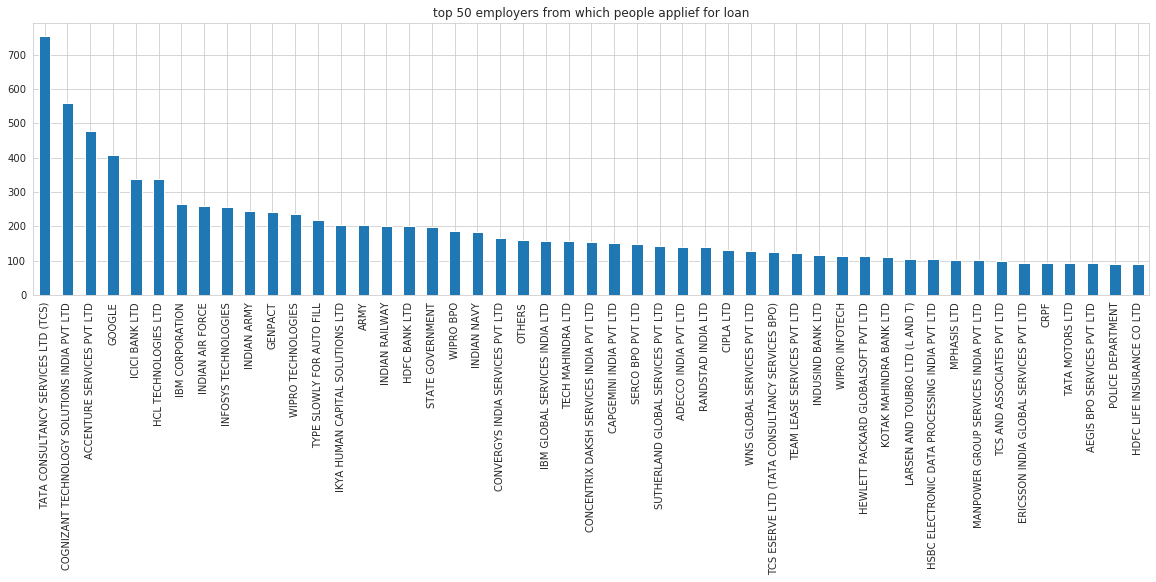

In [27]:
data['Employer_Name'].value_counts()[1:50].plot(kind = 'bar',figsize = (20,5))
plt.title('top 50 employers from which people applief for loan')

In [28]:
data.drop('Employer_Name',axis = 1,inplace = True)

In [29]:
data[['Existing_EMI']].describe()

,Existing_EMI
count,1.246260e+05
mean,3.636342e+03
std,3.369124e+04
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,3.500000e+03
max,1.000000e+07


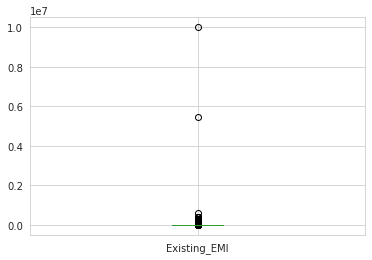

In [30]:
data['Existing_EMI'].plot(kind = 'box')

In [31]:
data['Existing_EMI'].isnull().sum()
#there are only 111 missing values in this so lets fill it with median of the column
data['Existing_EMI'].fillna(0,inplace = True)

In [32]:
data['Existing_EMI']

0             0.0
1             0.0
2             0.0
3             0.0
4         25000.0
           ...   
124732    10000.0
124733        0.0
124734        0.0
124735    67000.0
124736     4364.0
Name: Existing_EMI, Length: 124737, dtype: float64

In [33]:
data['Interest_Rate'].isnull().sum()
#maximum are missing values so lets create a new variable stating wether tha data is missing or not
data['Interest_Rate_Missing'] = data['Interest_Rate'].apply(lambda x : 1 if pd.isnull(x) else 0)

In [34]:
data[['Interest_Rate','Interest_Rate_Missing']]

,Interest_Rate,Interest_Rate_Missing
0,NaN,1
1,13.25,0
2,NaN,1
3,NaN,1
4,NaN,1
...,...,...
124732,NaN,1
124733,31.50,0
124734,NaN,1
124735,NaN,1


In [35]:
data.drop(columns = ['Interest_Rate'],inplace = True)

In [36]:
#lead_creation_date is a value which doesnot have any effect what so ever on our predictions
data.drop('Lead_Creation_Date',axis = 1,inplace = True)

In [37]:
data['Loan_Amount_Applied'].isnull().sum()
#only 111 null values so  lets fill it with median

111

In [38]:
data['Loan_Amount_Applied'].fillna(data['Loan_Amount_Applied'].median(),inplace = True)

In [39]:
data['Loan_Tenure_Applied'].isnull().sum()

111

In [40]:
data['Loan_Tenure_Applied'].fillna(data['Loan_Tenure_Applied'].median(),inplace = True)

In [41]:
data['Loan_Amount_Submitted_Missing'] = data['Loan_Amount_Submitted'].apply(lambda x :1 if pd.isnull(x) else 0)
data['Loan_Tenure_Submitted_Missing'] = data['Loan_Tenure_Submitted'].apply(lambda x :1 if pd.isnull(x) else 0)

In [42]:
data.drop(columns = ['Loan_Amount_Submitted','Loan_Tenure_Submitted'],inplace = True)

In [43]:
data.drop(columns = 'LoggedIn',inplace = True)

In [44]:
data.drop(columns = ['Salary_Account'],inplace = True)

In [45]:
data['Processing_Fee'].isnull().sum()

85346

In [46]:
data['Processing_Fee_Missing'] = data['Processing_Fee'].apply(lambda x : 1 if pd.isnull(x) else 0)

In [47]:
data.drop(columns = ['Processing_Fee'],inplace = True)

In [48]:
data['Source'] = data['Source'].apply(lambda x : 'others' if x not in ['S122','S133'] else x)

In [49]:
data['Source'].value_counts()

S122      55249
S133      42900
others    26588
Name: Source, dtype: int64

In [50]:
data.drop(columns = 'City',inplace = True)

In [51]:
data.apply(lambda x : x.isnull().sum())

Device_Type                          0
Disbursed                        37717
Existing_EMI                         0
Filled_Form                          0
Gender                               0
ID                                   0
Loan_Amount_Applied                  0
Loan_Tenure_Applied                  0
Mobile_Verified                      0
Monthly_Income                       0
Source                               0
Var1                                 0
Var2                                 0
Var4                                 0
Var5                                 0
source                               0
age                                  0
EMI_Loan_Submitted_missing           0
Interest_Rate_Missing                0
Loan_Amount_Submitted_Missing        0
Loan_Tenure_Submitted_Missing        0
Processing_Fee_Missing               0
dtype: int64

In [52]:
categorical_mask = data.columns[data.dtypes.values == object].tolist()

In [53]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data[categorical_mask] = data[categorical_mask].apply(lambda x : label_encoder.fit_transform(x.astype(str)))

In [57]:
data = pd.get_dummies(data,columns = ['Device_Type','Filled_Form','Gender','Mobile_Verified','Source','Var1','Var2'])

In [60]:
train = data[data['source'] == 1]

In [61]:
test = data[data['source'] == 0]

In [64]:
train.drop(columns = ['source'],inplace = True)
test.drop(['source','Disbursed'],axis = 1,inplace = True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [67]:
train.to_csv('train_modified.csv',index = False)
test.to_csv('test_modified.csv',index = False)